## PHÂN TÍCH DỮ LIỆU 

In [5]:
# Đọc dữ liệu 
import pandas as pd 

df = pd.read_csv("../data/data_processed/data_processed.csv")
#Bỏ cột thứ tự 
df = df.iloc[:, 1:]

df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### THỐNG KÊ MÔ TẢ TỪNG TRƯỜNG 

In [6]:
print(df.describe())

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.303857     2.722484     7.241298     3.659925     1.570085   
std       9.840844     3.560850    37.125309     2.847094     2.499229   
min     106.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     1.000000     0.000000   
50%     133.000000     1.000000     0.000000     3.000000     0.000000   
75%     140.000000     4.000000     2.000000     5.000000     3.000000   
max     160.000000    26.000000   564.000000    23.000000    16.000000   

                DS           DP         ASTV         MSTV        ALTV  ...  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.00000  ...   
mean      0.003293     0.126058    46.990122     1.332785     9.84666  ...   
std       0.057300     0.464361    17.192814     0.883241    18.39688  ...   
min       0.000000   

### HISTOGRAM CỦA CÁC ĐẶC TRƯNG 

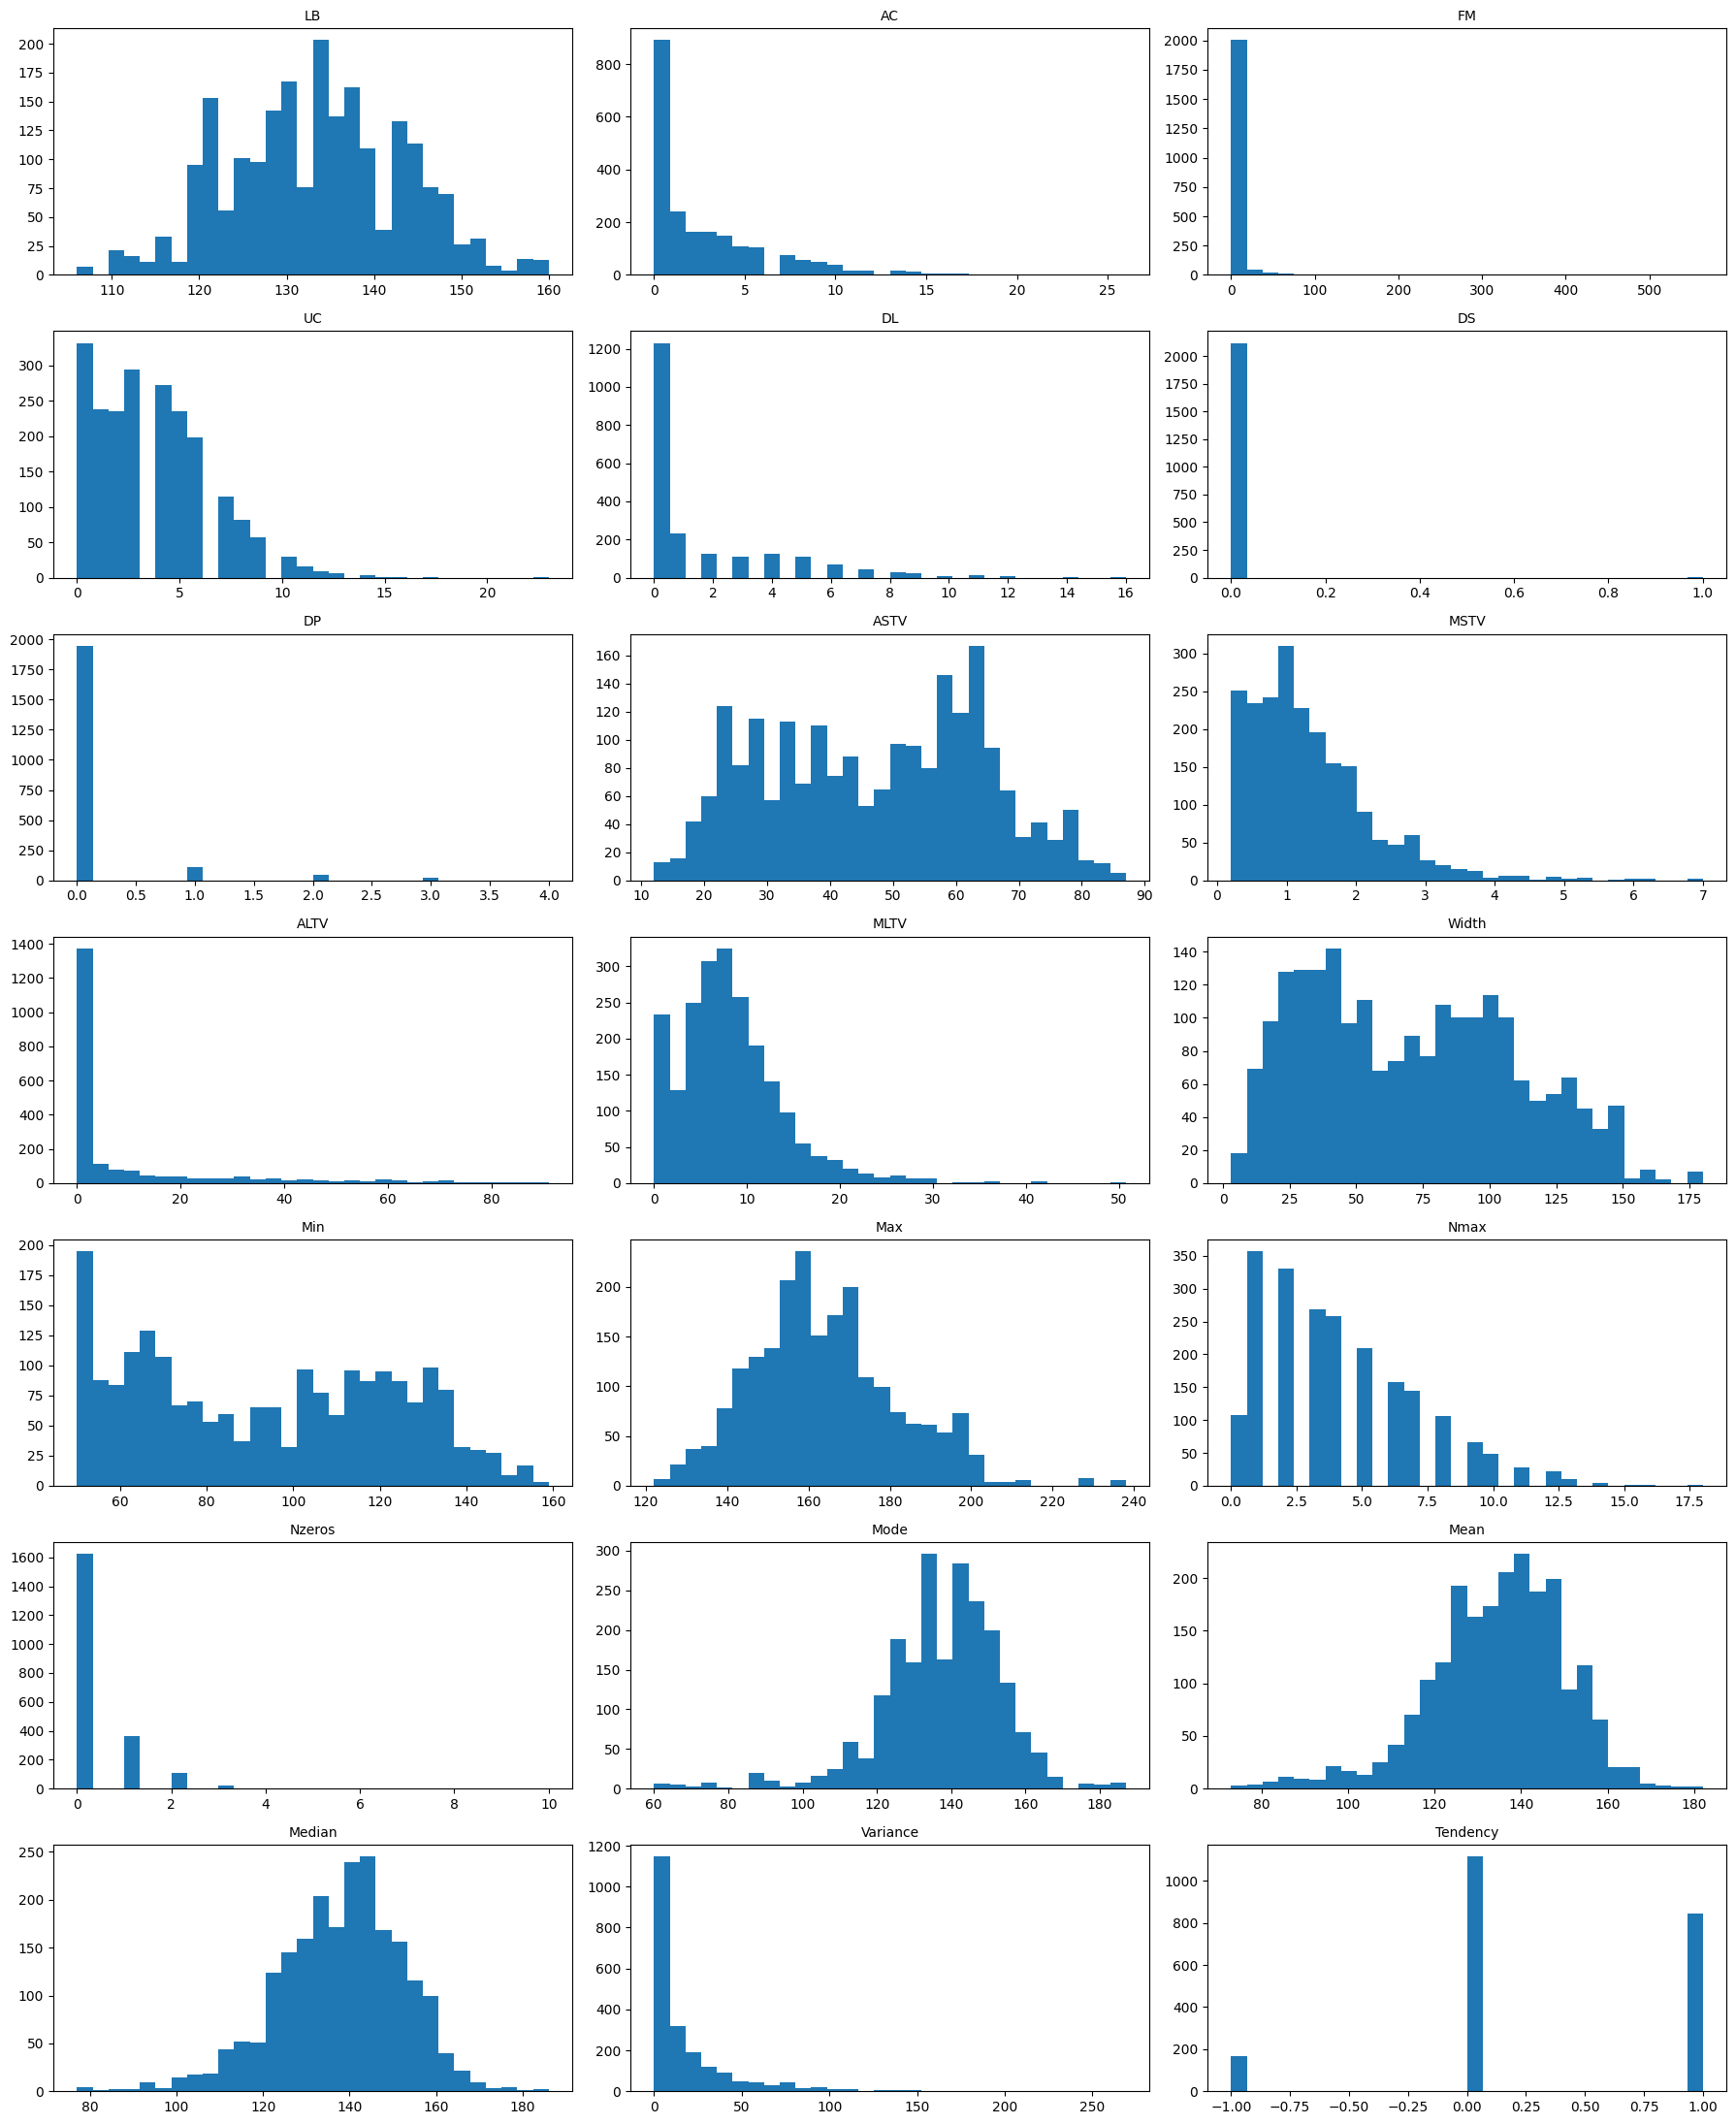

In [ ]:
import matplotlib.pyplot as plt

features = df.drop("NSP", axis=1).columns

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18, 22))
axes = axes.ravel() 

for i, col in enumerate(features):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col, fontsize=10)

plt.tight_layout()
plt.show()


### ĐẾM SỐ LƯỢNG MẪU THEO TỪNG LỚP 

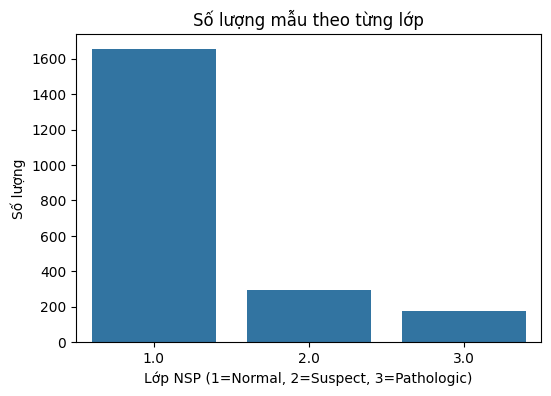

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='NSP', data=df)
plt.title('Số lượng mẫu theo từng lớp')
plt.xlabel('(1=Normal, 2=Suspect, 3=Pathologic)')
plt.ylabel('Số lượng')
plt.show()


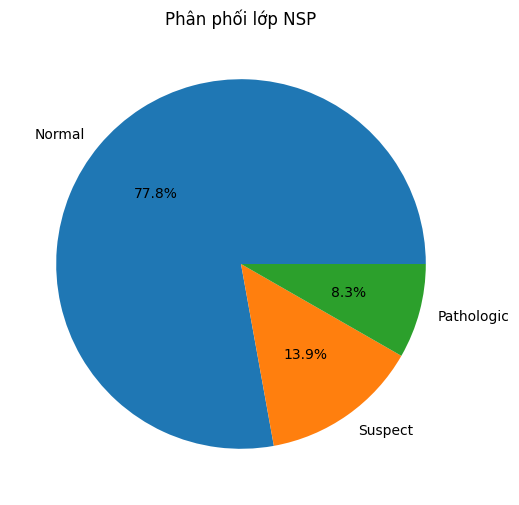

In [9]:
plt.figure(figsize=(6, 6))
df['NSP'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Normal', 'Suspect', 'Pathologic'])
plt.title('Phân phối lớp NSP')
plt.ylabel('')
plt.show()

### MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN 

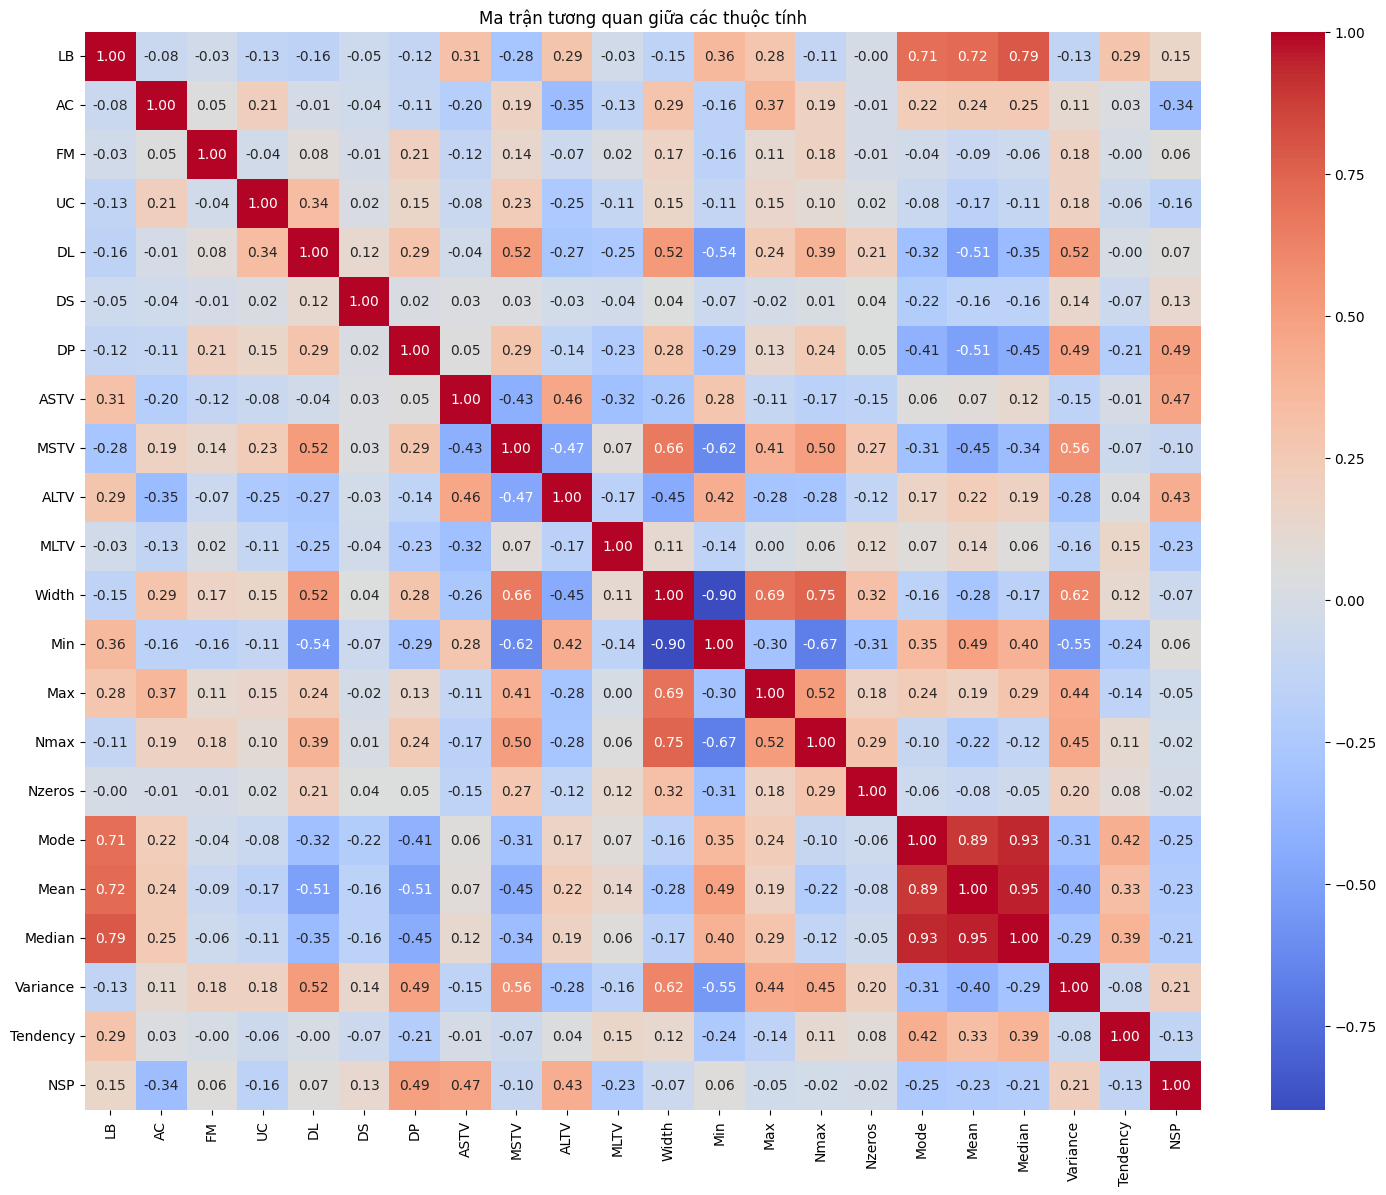

In [ ]:
plt.figure(figsize=(18, 14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận hệ số tương quan giữa các thuộc tính')
plt.show()


### TƯƠNG QUAN GIỮA CÁC THUỘC TÍNH VỚI ĐẦU RA 

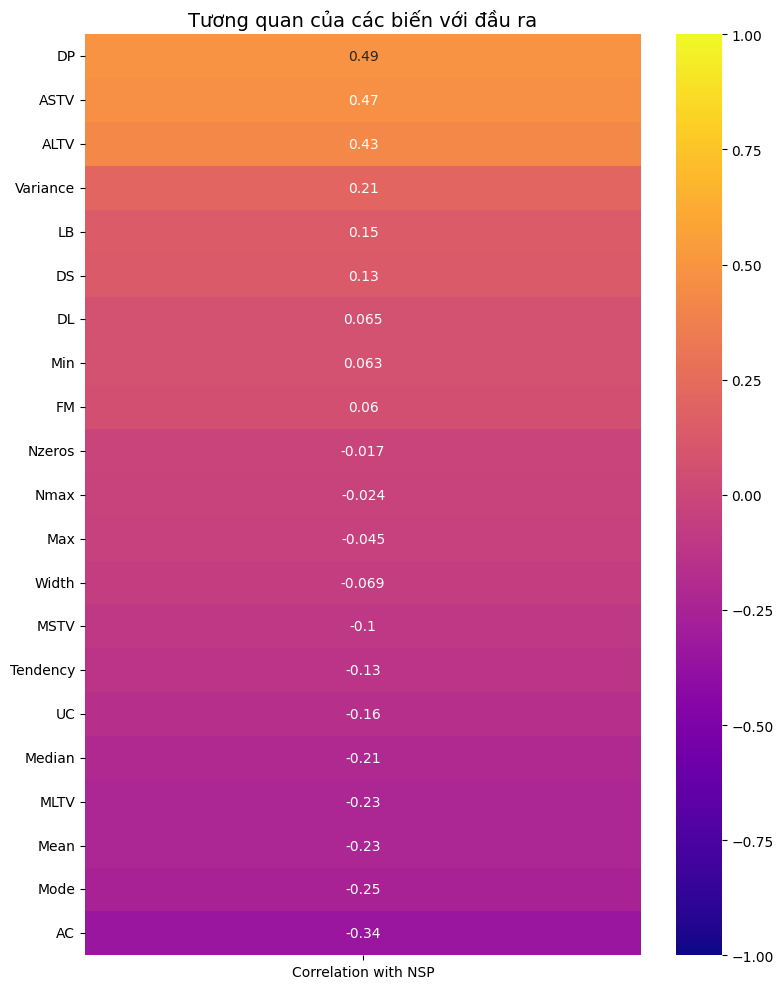

In [19]:
corr = df.corr()['NSP'].drop('NSP').sort_values(ascending=False)

corr_df = corr.to_frame().rename(columns={'NSP': 'Correlation with NSP'})

plt.figure(figsize=(8, 10))
sns.heatmap(corr_df, annot=True, cmap='plasma', vmin=-1, vmax=1, cbar=True)

plt.title('Tương quan của các biến với đầu ra', fontsize=14)
plt.tight_layout()
plt.show()
